In [1]:
from google.cloud import bigquery
import pandas as pd
import google
import os

# Establece la variable de entorno GOOGLE_APPLICATION_CREDENTIALS con la ruta al archivo de credenciales
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/raul.raggio/AppData/Roaming/gcloud/application_default_credentials.json"
credentials, project = google.auth.default()

project="peya-chile"


client = bigquery.Client(project=project, credentials=credentials)
print("Client creating using default project: {}".format(client.project))

Client creating using default project: peya-chile


c:\Users\raul.raggio\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [5]:
flag=1

In [6]:

if flag ==0:
    
    sql1 = """

 SELECT
    p.country.country_code,
  order_code,
  global_order_id,
  EXTRACT(DATE FROM DATETIME(ov2.created_at,ov2.timezone)) AS created_date,
  EXTRACT(HOUR FROM DATETIME(ov2.created_at ,ov2.timezone)) AS created_hour,

  vendor_code AS partner_id,
  franchise.franchise_name AS franchise_name,
  p.partner_name,
  p.business_type.business_type_name AS Business_Name,
  p.main_cousine_category_name AS main_cuisine,
  p.city.name AS City,
    CASE
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) = 1 THEN 7
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) = 2 THEN 1
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) = 3 THEN 2
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) = 4 THEN 3
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) = 5 THEN 4
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) = 6 THEN 5
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) = 7 THEN 6
    END AS day_of_week_number,
    CASE
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) IN (2, 3, 4, 5) THEN 'dia_de_semana'
        WHEN EXTRACT(DAYOFWEEK FROM DATETIME(ov2.created_at,ov2.timezone)) IN (6, 7, 1) THEN 'fin_de_semana'
    END AS dia_categoria,

    CASE
        WHEN EXTRACT(HOUR FROM DATETIME(ov2.created_at,ov2.timezone)) BETWEEN 0 AND 11 THEN '0-11'
        WHEN EXTRACT(HOUR FROM DATETIME(ov2.created_at,ov2.timezone)) BETWEEN 12 AND 14 THEN '12-14'
        WHEN EXTRACT(HOUR FROM DATETIME(ov2.created_at,ov2.timezone)) BETWEEN 15 AND 17 THEN '15-17'
        WHEN EXTRACT(HOUR FROM DATETIME(ov2.created_at,ov2.timezone)) BETWEEN 18 AND 20 THEN '18-20'
        WHEN EXTRACT(HOUR FROM DATETIME(ov2.created_at,ov2.timezone)) BETWEEN 21 AND 23 THEN '21-23'
    END AS time_slot,

  ROUND(DATETIME_DIFF(rider.food_is_ready_at,rider.sent_to_vendor_at, SECOND)/60,1) AS RPT,
  ROUND(rider.estimated_prep_time/60,1) AS EPT,
  ROUND(rider.estimated_prep_buffer/60,1) AS buffer,
  ROUND(SAFE_DIVIDE(
    DATETIME_DIFF(rider.food_is_ready_at,rider.sent_to_vendor_at, SECOND),
    rider.estimated_prep_time)*100) AS Ratio,
  COUNT(DISTINCT CASE WHEN rider.food_is_ready_at IS NOT NULL THEN ov2.order_code ELSE NULL END) AS orders_with_fir,
  COUNT(DISTINCT CASE WHEN ov2.vendor.order_status = 'completed' THEN order_code ELSE NULL END) AS confirmed_orders,
  COUNT(DISTINCT order_code) AS total_orders,
  
  COUNT(DISTINCT CASE WHEN ov2.rider.order_status = 'completed' AND ov2.rider.timings.vendor_late > 600 THEN ov2.order_code ELSE NULL END) AS VL_Num,
  COUNT(DISTINCT CASE WHEN ov2.rider.order_status = 'completed' AND ov2.rider.timings.vendor_late IS NOT NULL THEN ov2.order_code END) AS VL_Den,
  COUNT(DISTINCT CASE WHEN ov2.rider.order_status = 'completed' AND ov2.rider.timings.vendor_late > 600 AND rider.food_is_ready_at IS NOT NULL THEN ov2.order_code ELSE NULL END) AS VL_Num_FIR,
FROM `peya-data-origins-pro.cl_hurrier.orders_v2` ov2
LEFT JOIN `peya-bi-tools-pro.il_core.dim_partner` AS p
  ON vendor_code = CAST(partner_id AS STRING)
WHERE TRUE
  AND ov2.created_date between DATE('2025-01-01') AND current_date()
  AND p.country_id = 2

  AND ov2.delivery_type = "OWN_DELIVERY"
  

GROUP BY 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
ORDER BY 2 DESC
    """

    data1=client.query(sql1).to_dataframe()
    data1.to_csv("data1.csv")
else:
    
    data1=pd.read_csv("data1.csv")

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_26980\513918310.py:71: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv("data1.csv")


In [7]:
data1.head()

,Unnamed: 0,country_code,order_code,global_order_id,created_date,created_hour,partner_id,franchise_name,partner_name,Business_Name,...,RPT,EPT,buffer,Ratio,orders_with_fir,confirmed_orders,total_orders,VL_Num,VL_Den,VL_Num_FIR
0,0,CL,obs-fc240978-d674-4c13-ba15-fda551cc1573,obs-fc240978-d674-4c13-ba15-fda551cc1573,2025-01-16,16,270554,Market PedidosYa,PedidosYa Market - Estación Central,Market,...,0.7,7.0,0.0,10.0,1,0,1,0,0,0
1,1,CL,obs-fb785188-4eb2-45f0-a332-713235e5f022,obs-fb785188-4eb2-45f0-a332-713235e5f022,2025-01-29,16,289949,Market PedidosYa,PedidosYa Market - Manquehue,Market,...,1.3,7.0,0.0,19.0,1,0,1,0,0,0
2,2,CL,obs-faccd41d-f1b7-4c2f-bd30-a1b053c4ec63,obs-faccd41d-f1b7-4c2f-bd30-a1b053c4ec63,2025-02-19,17,184380,Market PedidosYa,PedidosYa Market Maipu,Market,...,8.0,7.0,0.0,114.0,1,0,1,0,0,0
3,3,CL,obs-f96275aa-3b07-441c-a28d-dc226c2d1bac,obs-f96275aa-3b07-441c-a28d-dc226c2d1bac,2025-01-02,12,289949,Market PedidosYa,PedidosYa Market - Manquehue,Market,...,4.2,7.0,0.0,60.0,1,0,1,0,1,0
4,4,CL,obs-f8d7c1b0-f7fe-4138-b385-912193b30be7,obs-f8d7c1b0-f7fe-4138-b385-912193b30be7,2025-01-14,10,184380,Market PedidosYa,PedidosYa Market Maipu,Market,...,1.8,7.0,0.0,26.0,1,0,1,0,0,0


In [8]:
df1=data1
df1['orders_with_fir'] = df1['orders_with_fir'].astype(str).str.replace(',', '').astype(float)
df1['confirmed_orders'] = df1['confirmed_orders'].astype(str).str.replace(',', '').astype(float)
df1['total_orders'] = df1['total_orders'].astype(str).str.replace(',', '').astype(float)
df1['created_date'] = pd.to_datetime(df1['created_date'])
df1["diff"]=df1["RPT"]-df1["EPT"]
df1['Business_Name'].fillna("no vertical", inplace=True)
df1['franchise_name'].fillna("no franchise", inplace=True)


C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_26980\3386484453.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Business_Name'].fillna("no vertical", inplace=True)
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_26980\3386484453.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [9]:
df1.head()

,Unnamed: 0,country_code,order_code,global_order_id,created_date,created_hour,partner_id,franchise_name,partner_name,Business_Name,...,EPT,buffer,Ratio,orders_with_fir,confirmed_orders,total_orders,VL_Num,VL_Den,VL_Num_FIR,diff
0,0,CL,obs-fc240978-d674-4c13-ba15-fda551cc1573,obs-fc240978-d674-4c13-ba15-fda551cc1573,2025-01-16,16,270554,Market PedidosYa,PedidosYa Market - Estación Central,Market,...,7.0,0.0,10.0,1.0,0.0,1.0,0,0,0,-6.3
1,1,CL,obs-fb785188-4eb2-45f0-a332-713235e5f022,obs-fb785188-4eb2-45f0-a332-713235e5f022,2025-01-29,16,289949,Market PedidosYa,PedidosYa Market - Manquehue,Market,...,7.0,0.0,19.0,1.0,0.0,1.0,0,0,0,-5.7
2,2,CL,obs-faccd41d-f1b7-4c2f-bd30-a1b053c4ec63,obs-faccd41d-f1b7-4c2f-bd30-a1b053c4ec63,2025-02-19,17,184380,Market PedidosYa,PedidosYa Market Maipu,Market,...,7.0,0.0,114.0,1.0,0.0,1.0,0,0,0,1.0
3,3,CL,obs-f96275aa-3b07-441c-a28d-dc226c2d1bac,obs-f96275aa-3b07-441c-a28d-dc226c2d1bac,2025-01-02,12,289949,Market PedidosYa,PedidosYa Market - Manquehue,Market,...,7.0,0.0,60.0,1.0,0.0,1.0,0,1,0,-2.8
4,4,CL,obs-f8d7c1b0-f7fe-4138-b385-912193b30be7,obs-f8d7c1b0-f7fe-4138-b385-912193b30be7,2025-01-14,10,184380,Market PedidosYa,PedidosYa Market Maipu,Market,...,7.0,0.0,26.0,1.0,0.0,1.0,0,0,0,-5.2


In [10]:

def asignar_horario(hora):
    if hora<=11:
        return '0-11'
    elif hora<=14:
        return '12-14'
    elif hora<=17:
        return '15-17'
    elif hora<=20:
        return '18-20'
    else:
        return '21-23'
    

df1['horario'] = df1["created_hour"].apply(asignar_horario)  
df1['day_of_week'] = df1['created_date'].dt.day_name()


In [11]:
dfaux=df1[  (df1["Business_Name"].isin(["Restaurant","Coffee"])) ]
grouped = dfaux.groupby(['country_code']).agg({'orders_with_fir':'sum','total_orders':'sum','Ratio':'mean'})
grouped["%fir"]=grouped["orders_with_fir"]/grouped["total_orders"]

prueba=pd.DataFrame(grouped)
prueba=prueba.reset_index()
prueba

,country_code,orders_with_fir,total_orders,Ratio,%fir
0,CL,1586000.0,3859288.0,93.947698,0.410957


In [16]:
import numpy as np
# Define las condiciones y asigna los valores a la columna 'grupo'
conditions = [
      (df1['created_date'] == '2025-02-14') ,
    #(df1['logistic_orders_created_date_local_date']== '2025-01-17	') ,
    (df1['created_date']== '2025-02-21	') 
    #(df1['logistic_orders_created_date_local_date'] <= '2024-05-06')
]

values = ['14 feb', 'comparacion']

# Por defecto, si no cumple ninguna de las condiciones anteriores, se asigna 'otras_fechas'
df1['grupo'] = pd.Series(np.select(conditions, values, default='otras_fechas'))

In [20]:
df1["ci"]=df1["EPT"]-2*df1["buffer"]
df1["fir_considerado"] = df1.apply(lambda row: 1 if row["RPT"] > row["ci"] else 0, axis=1)

In [38]:
dfaux=df1[  (df1["Business_Name"].isin(["Restaurant","Coffee"])) & (df1["created_date"]>="2025-01-06")  ]
grouped = dfaux.groupby(['country_code','grupo']).agg({'orders_with_fir':'sum','total_orders':'sum','Ratio':'mean','fir_considerado':'sum'}).reset_index()
grouped["%fir"]=grouped["orders_with_fir"]/grouped["total_orders"]
grouped["%fir_Considerado"]=grouped["fir_considerado"]/grouped["orders_with_fir"]
grouped=grouped.sort_values(by="total_orders",ascending=False)
prueba=pd.DataFrame(grouped)

prueba

,country_code,grupo,orders_with_fir,total_orders,Ratio,fir_considerado,%fir,%fir_Considerado
2,CL,otras_fechas,1375164.0,3336669.0,93.952633,693645,0.412137,0.504409
0,CL,14 feb,37377.0,95996.0,103.117880,20818,0.389360,0.556974
1,CL,comparacion,33474.0,80773.0,90.819561,16357,0.414421,0.488648


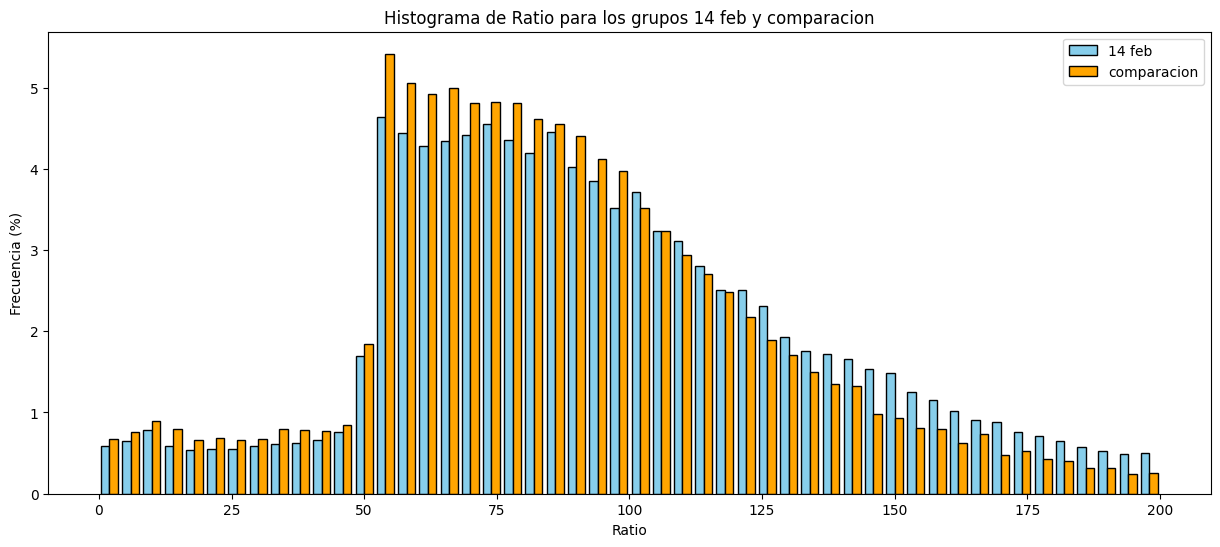

In [32]:
import matplotlib.pyplot as plt


# Filtrar los datos para los grupos "14 feb" y "comparacion"

dfchart=df1[  (df1["Business_Name"].isin(["Restaurant","Coffee"])) &  (df1["Ratio"]<=200)]
df_14_feb = dfchart[dfchart['grupo'] == '14 feb']
df_comparacion = dfchart[dfchart['grupo'] == 'comparacion']

# Crear el histograma
plt.figure(figsize=(15, 6))
plt.hist([df_14_feb['Ratio'].dropna(), df_comparacion['Ratio'].dropna()], 
         bins=50, color=['skyblue', 'orange'], edgecolor='black', 
         label=['14 feb', 'comparacion'], weights=[np.ones_like(df_14_feb['Ratio'].dropna()) / len(df_14_feb['Ratio'].dropna()) * 100, 
                                                   np.ones_like(df_comparacion['Ratio'].dropna()) / len(df_comparacion['Ratio'].dropna()) * 100])

# Añadir etiquetas y título
plt.xlabel('Ratio')
plt.ylabel('Frecuencia (%)')
plt.title('Histograma de Ratio para los grupos 14 feb y comparacion')
plt.legend()

# Mostrar el histograma
plt.show()